## data


In [ ]:
!pip install azure-storage-blob azure-ai-formrecognizer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.0/407.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.1/207.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
AZURE_FORM_RECOGNIZER_ENDPOINT = "https://agentic-pod-document-intelligence-svc.cognitiveservices.azure.com/"
AZURE_FORM_RECOGNIZER_KEY = "5xdSJ4ijR0LlX17Cop9qZYhGhwjsWEIbUjPiSv0CBFzVgvNjFMyEJQQJ99BDAC5RqLJXJ3w3AAALACOGTyLg"

AZURE_BLOB_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=agenticpodstorageacnt;AccountKey=WbE1Lm0JH1aTSuBWw7Lhlrc0igamXOIqOcOtePDrL3gDhWWfCE6ul4jDw2tdVE09KG56HxhbEDHc+AStBHv5dQ==;EndpointSuffix=core.windows.net"
AZURE_BLOB_CONTAINER_NAME = "ocr-docs"
AZURE_BLOB_PDF_NAME = "SampleContract-Shuttle.pdf"

In [ ]:
import os
import tempfile
import json
from azure.storage.blob import BlobServiceClient
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential

def download_pdf_from_blob():
    blob_service_client = BlobServiceClient.from_connection_string(AZURE_BLOB_CONNECTION_STRING)
    blob_client = blob_service_client.get_blob_client(container=AZURE_BLOB_CONTAINER_NAME, blob=AZURE_BLOB_PDF_NAME)

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf")
    with open(temp_file.name, "wb") as f:
        f.write(blob_client.download_blob().readall())

    print(f"Downloaded PDF to {temp_file.name}")
    return temp_file.name

def analyze_pdf_by_page(pdf_path):
    document_analysis_client = DocumentAnalysisClient(
        endpoint=AZURE_FORM_RECOGNIZER_ENDPOINT,
        credential=AzureKeyCredential(AZURE_FORM_RECOGNIZER_KEY)
    )

    results = {}
    with open(pdf_path, "rb") as f:
        poller = document_analysis_client.begin_analyze_document("prebuilt-document", document=f)
        result = poller.result()

        for page in doc_result.pages:
            page_info = {
                "page_number": page.page_number,
                "width": page.width,
                "height": page.height,
                "unit": page.unit,
                "lines": [],
                "words": []
            }
            for line in page.lines:
                page_info["lines"].append({
                    "content": line.content,
                    "bounding_box": [p for p in line.polygon]
                })

            for word in page.words:
                page_info["words"].append({
                    "content": word.content,
                    "confidence": word.confidence
                })
        for page in result.pages:
            page_data = {
                "page_number": page.page_number,
                "width": page.width,
                "height": page.height,
                "unit": page.unit,
                "lines": []
            }
            for line in page.lines:
                page_data["lines"].append({
                    "content": line.content,
                    "bounding_box": [p for p in line.polygon]
                })
            results[f"page_{page.page_number}"] = page_data
    return results

if __name__ == "__main__":
    pdf_path = download_pdf_from_blob()
    json_output = analyze_pdf_by_page(pdf_path)

    print(json.dumps(json_output, indent=2))


Streaming output truncated to the last 5000 lines.
      },
      {
        "content": "more than fifteen (15) employees, provided that the foregoing provisions shall not apply to contracts",
        "bounding_box": [
          [
            1.4851,
            4.316
          ],
          [
            7.6404,
            4.3207
          ],
          [
            7.6404,
            4.4878
          ],
          [
            1.4851,
            4.4831
          ]
        ]
      },
      {
        "content": "or subcontracts for standard commercial supplies or raw materials.",
        "bounding_box": [
          [
            1.4803,
            4.4974
          ],
          [
            5.5632,
            4.4974
          ],
          [
            5.5632,
            4.6597
          ],
          [
            1.4803,
            4.6549
          ]
        ]
      },
      {
        "content": "7. FEDERAL, STATE AND LOCAL LAWS. CONSULTANT warrants that in the performance of thi

# **From Azure Documentation -->**

In [ ]:
# import libraries
import os
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential

endpoint = "https://agentic-pod-document-intelligence-svc.cognitiveservices.azure.com/"
key = "5xdSJ4ijR0LlX17Cop9qZYhGhwjsWEIbUjPiSv0CBFzVgvNjFMyEJQQJ99BDAC5RqLJXJ3w3AAALACOGTyLg"

def format_polygon(polygon):
    if not polygon:
        return "N/A"
    return ", ".join(["[{}, {}]".format(p.x, p.y) for p in polygon])


def analyze_layout():
    # sample document
    formUrl = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-REST-api-samples/master/curl/form-recognizer/sample-layout.pdf"

    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )

    poller = document_analysis_client.begin_analyze_document_from_url(
        "prebuilt-layout", formUrl
    )
    result = poller.result()

    for idx, style in enumerate(result.styles):
        print(
            "Document contains {} content".format(
                "handwritten" if style.is_handwritten else "no handwritten"
            )
        )

    for page in result.pages:
        print("----Analyzing layout from page #{}----".format(page.page_number))
        print(
            "Page has width: {} and height: {}, measured with unit: {}".format(
                page.width, page.height, page.unit
            )
        )

        for line_idx, line in enumerate(page.lines):
            words = line.get_words()
            print(
                "...Line # {} has word count {} and text '{}' within bounding polygon '{}'".format(
                    line_idx,
                    len(words),
                    line.content,
                    format_polygon(line.polygon),
                )
            )

            for word in words:
                print(
                    "......Word '{}' has a confidence of {}".format(
                        word.content, word.confidence
                    )
                )

        for selection_mark in page.selection_marks:
            print(
                "...Selection mark is '{}' within bounding polygon '{}' and has a confidence of {}".format(
                    selection_mark.state,
                    format_polygon(selection_mark.polygon),
                    selection_mark.confidence,
                )
            )

    for table_idx, table in enumerate(result.tables):
        print(
            "Table # {} has {} rows and {} columns".format(
                table_idx, table.row_count, table.column_count
            )
        )
        for region in table.bounding_regions:
            print(
                "Table # {} location on page: {} is {}".format(
                    table_idx,
                    region.page_number,
                    format_polygon(region.polygon),
                )
            )
        for cell in table.cells:
            print(
                "...Cell[{}][{}] has content '{}'".format(
                    cell.row_index,
                    cell.column_index,
                    cell.content,
                )
            )
            for region in cell.bounding_regions:
                print(
                    "...content on page {} is within bounding polygon '{}'".format(
                        region.page_number,
                        format_polygon(region.polygon),
                    )
                )

    print("----------------------------------------")


if __name__ == "__main__":
    analyze_layout()

Document contains handwritten content
----Analyzing layout from page #1----
Page has width: 8.5 and height: 11.0, measured with unit: inch
...Line # 0 has word count 2 and text 'UNITED STATES' within bounding polygon '[3.4669, 0.6636], [5.0236, 0.6589], [5.0236, 0.8451], [3.4669, 0.8498]'
......Word 'UNITED' has a confidence of 0.995
......Word 'STATES' has a confidence of 0.992
...Line # 1 has word count 4 and text 'SECURITIES AND EXCHANGE COMMISSION' within bounding polygon '[2.168, 0.8737], [6.3129, 0.8737], [6.3129, 1.0647], [2.168, 1.0647]'
......Word 'SECURITIES' has a confidence of 0.994
......Word 'AND' has a confidence of 0.998
......Word 'EXCHANGE' has a confidence of 0.995
......Word 'COMMISSION' has a confidence of 0.993
...Line # 2 has word count 3 and text 'Washington, D.C. 20549' within bounding polygon '[3.443, 1.0885], [5.057, 1.0838], [5.057, 1.2509], [3.443, 1.2604]'
......Word 'Washington,' has a confidence of 0.99
......Word 'D.C.' has a confidence of 0.989
......W

## translation


In [ ]:
import os
import requests
import uuid
import json

# Azure configuration
AZURE_TRANSLATOR_ENDPOINT = os.getenv("AZURE_TRANSLATOR_ENDPOINT", "https://api.cognitive.microsofttranslator.com")
AZURE_TRANSLATOR_KEY = os.getenv("AZURE_TRANSLATOR_KEY", "Ep3RIqbUBCpskWV2YnwcRtaR5PTMPHS3zKbTjOZouwonzSjeyCVMJQQJ99BEAC5RqLJXJ3w3AAAbACOGa5uN ")  # Replace with your actual Azure key
AZURE_TRANSLATOR_REGION = os.getenv("AZURE_TRANSLATOR_REGION", "westeurope")   # Replace if needed, e.g., "eastus"

# File paths
INPUT_FILE = "/content/English.txt"
OUTPUT_FILE = "output_fr.txt"

def translate_text(text, from_lang="en", to_lang="fr"):
    url = f"{AZURE_TRANSLATOR_ENDPOINT}/translate?api-version=3.0&from={from_lang}&to={to_lang}"

    headers = {
        "Ocp-Apim-Subscription-Key": AZURE_TRANSLATOR_KEY,
        "Ocp-Apim-Subscription-Region": AZURE_TRANSLATOR_REGION,
        "Content-Type": "application/json",
        "X-ClientTraceId": str(uuid.uuid4())
    }

    body = [{"text": text}]
    response = requests.post(url, headers=headers, json=body)
    response.raise_for_status()
    return response.json()[0]['translations'][0]['text']

def translate_file(input_path, output_path, target_language="fr"):
    with open(input_path, "r", encoding="utf-8") as f:
        text = f.read()

    translated_text = translate_text(text, from_lang="en", to_lang=target_language)

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(translated_text)

    print(f"Translated '{input_path}' → '{output_path}' ({target_language})")

if __name__ == "__main__":
    translate_file(INPUT_FILE, OUTPUT_FILE, target_language="fr")


Translated '/content/English.txt' → 'output_fr.txt' (fr)


## text

In [ ]:
pip install azure-storage-blob requests python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.0/407.0 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 18.1 MB/s eta 0:00:00


In [ ]:
import os
import requests
import uuid
import json
from azure.storage.blob import BlobServiceClient

# Azure Translator configuration
AZURE_TRANSLATOR_ENDPOINT = os.getenv("AZURE_TRANSLATOR_ENDPOINT", "https://api.cognitive.microsofttranslator.com")
AZURE_TRANSLATOR_KEY = os.getenv("AZURE_TRANSLATOR_KEY", "Ep3RIqbUBCpskWV2YnwcRtaR5PTMPHS3zKbTjOZouwonzSjeyCVMJQQJ99BEAC5RqLJXJ3w3AAAbACOGa5uN ")  # Replace with your actual Azure key
AZURE_TRANSLATOR_REGION = os.getenv("AZURE_TRANSLATOR_REGION", "westeurope")

# Azure Blob Storage configuration
AZURE_BLOB_CONNECTION_STRING = os.getenv("AZURE_BLOB_CONNECTION_STRING", "DefaultEndpointsProtocol=https;AccountName=agenticpodstorageacnt;AccountKey=WbE1Lm0JH1aTSuBWw7Lhlrc0igamXOIqOcOtePDrL3gDhWWfCE6ul4jDw2tdVE09KG56HxhbEDHc+AStBHv5dQ==;EndpointSuffix=core.windows.net")
INPUT_CONTAINER_NAME = "translation-input"
INPUT_BLOB_NAME = "English.txt"
OUTPUT_CONTAINER_NAME = "translation-input"
OUTPUT_BLOB_NAME = "Translated_French.txt"

def translate_text(text, from_lang="en", to_lang="fr"):
    url = f"{AZURE_TRANSLATOR_ENDPOINT}/translate?api-version=3.0&from={from_lang}&to={to_lang}"

    headers = {
        "Ocp-Apim-Subscription-Key": AZURE_TRANSLATOR_KEY,
        "Ocp-Apim-Subscription-Region": AZURE_TRANSLATOR_REGION,
        "Content-Type": "application/json",
        "X-ClientTraceId": str(uuid.uuid4())
    }

    body = [{"text": text}]
    response = requests.post(url, headers=headers, json=body)
    response.raise_for_status()
    return response.json()[0]['translations'][0]['text']

def read_blob(blob_service_client, container_name, blob_name):
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
    blob_data = blob_client.download_blob()
    return blob_data.readall().decode("utf-8")

def write_blob(blob_service_client, container_name, blob_name, content):
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
    blob_client.upload_blob(content, overwrite=True)

def main():
    # Initialize Blob service client
    blob_service_client = BlobServiceClient.from_connection_string(AZURE_BLOB_CONNECTION_STRING)

    # Step 1: Read input text from Blob
    input_text = read_blob(blob_service_client, INPUT_CONTAINER_NAME, INPUT_BLOB_NAME)

    # Step 2: Translate text
    translated_text = translate_text(input_text, from_lang="en", to_lang="fr")

    # Step 3: Write translated text back to Blob
    write_blob(blob_service_client, OUTPUT_CONTAINER_NAME, OUTPUT_BLOB_NAME, translated_text)

    print(f"Translated file saved to '{OUTPUT_CONTAINER_NAME}/{OUTPUT_BLOB_NAME}'")

if __name__ == "__main__":
    main()


Translated file saved to 'translation-input/Translated_French.txt'


## upload metadeta

In [ ]:
from azure.storage.blob import BlobServiceClient, ContentSettings

# Config
CONNECTION_STRING = ZURE_BLOB_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=agenticpodstorageacnt;AccountKey=WbE1Lm0JH1aTSuBWw7Lhlrc0igamXOIqOcOtePDrL3gDhWWfCE6ul4jDw2tdVE09KG56HxhbEDHc+AStBHv5dQ==;EndpointSuffix=core.windows.net")
CONTAINER_NAME = "translation-input"
BLOB_NAME = "glossary_terms.txt"
USERNAME = "john_doe"

# Metadata
metadata = {
    "username": USERNAME,
    "glossary_type": "industry_terms",
    "entity_focus": "manufacturing",
    "ner_mode": "enhanced",
    "upload_purpose": "custom_ner_training",
    "upload_timestamp": "2025-05-14T10:00:00Z"
}

# Upload the file
blob_service_client = BlobServiceClient.from_connection_string(CONNECTION_STRING)
blob_client = blob_service_client.get_blob_client(container=CONTAINER_NAME, blob=BLOB_NAME)

with open("path/to/glossary_terms.txt", "rb") as data:
    blob_client.upload_blob(
        data,
        overwrite=True,
        content_settings=ContentSettings(content_type="text/plain"),
        metadata=metadata
    )


In [ ]:
from azure.storage.blob import BlobServiceClient, ContentSettings
import os

CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=agenticpodstorageacnt;AccountKey=WbE1Lm0JH1aTSuBWw7Lhlrc0igamXOIqOcOtePDrL3gDhWWfCE6ul4jDw2tdVE09KG56HxhbEDHc+AStBHv5dQ==;EndpointSuffix=core.windows.net"

CONTAINER_NAME = "translation-input"

# 📂 Your container and file details
FILE_PATH = "/content/metadata_trans.txt"  # Change this to your actual file path
USERNAME = "john_doe"
BLOB_NAME = os.path.basename(FILE_PATH)

# 🔧 Initialize blob client
blob_service_client = BlobServiceClient.from_connection_string(CONNECTION_STRING)
blob_client = blob_service_client.get_blob_client(container=CONTAINER_NAME, blob=BLOB_NAME)

# 📤 Upload file using your exact snippet
with open(FILE_PATH, "rb") as data:
    blob_client.upload_blob(
        data,
        overwrite=True,
        content_settings=ContentSettings(content_type="application/pdf"),
        metadata={
            "username": USERNAME,
            "filename": BLOB_NAME
        }
    )

print(f"✅ File '{BLOB_NAME}' uploaded successfully with metadata.")


✅ File 'metadata_trans.txt' uploaded successfully with metadata.


In [6]:
pip install mistralai

Starting Mistral OCR for Multiple Images
------------------------------------------------------------
Please upload one or more handwritten images to process with Mistral OCR:


Saving img 1.png to img 1 (1).png
Saving img 2.png to img 2.png
Saving img 3.png to img 3.png

--- Image 1 ---


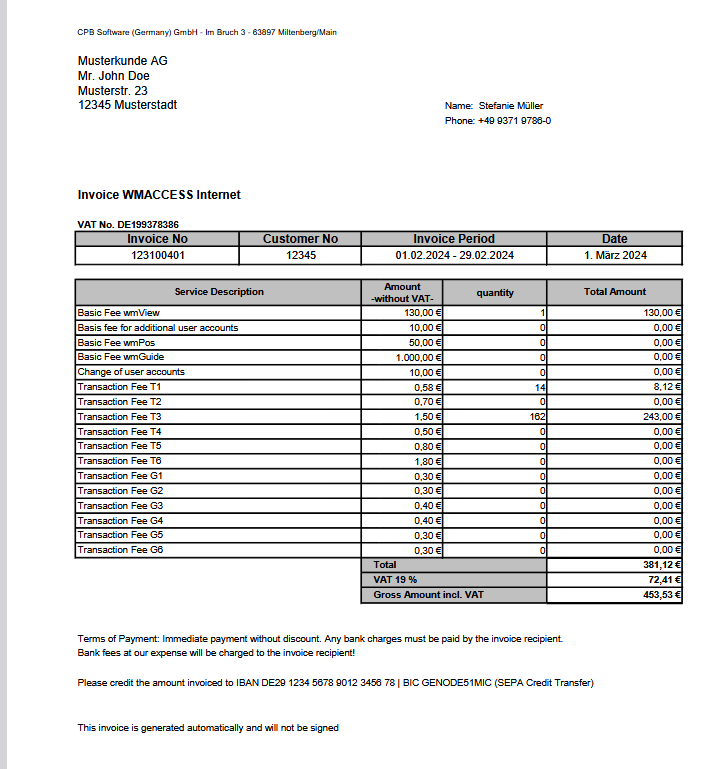

--- OCR Result 1 ---
# Musterkunde AG

Mr. John Doe Musterstr. 23 12345 Musterstadt Name: Stefanie Müller Phone: +49 9371 9786-0

## Invoice WMACCESS Internet

VAT No. DE199378386

|  Invoice No | Customer No | Invoice Period | Date  |
| --- | --- | --- | --- |
|  123100401 | 12345 | 01.02.2024 - 29.02.2024 | 1. März 2024  |

|  Service Description | Amount
-without VAT | quantity | Total Amount  |
| --- | --- | --- | --- |
|  Basic Fee wmView | 130.00 € | 1 | 130.00 €  |
|  Basis fee for additional user accounts | 10.00 € | 0 | 0.00 €  |
|  Basic Fee wmPos | 50.00 € | 0 | 0.00 €  |
|  Basic Fee wmGuide | 1.000 .00 € | 0 | 0.00 €  |
|  Change of user accounts | 10.00 € | 0 | 0.00 €  |
|  Transaction Fee T1 | 0.58 € | 14 | 8.12 €  |
|  Transaction Fee T2 | 0.70 € | 0 | 0.00 €  |
|  Transaction Fee T3 | 1.50 € | 162 | 243.00 €  |
|  Transaction Fee T4 | 0.50 € | 0 | 0.00 €  |
|  Transaction Fee T5 | 0.80 € | 0 | 0.00 €  |
|  Transaction Fee T6 | 1.80 € | 0 | 0.00 €  |
|  Transaction Fee 

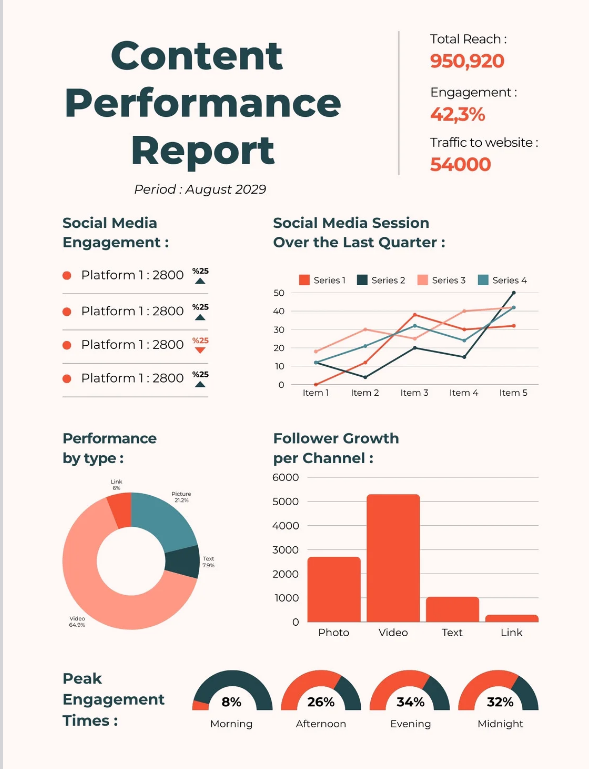

--- OCR Result 2 ---
# Content Performance Report

**Total Reach:** 950,920

**Engagement:** 42.3%

**Traffic to website:** 54000

**Period:** August 2029

## Social Media Engagement:

- **Platform 1:** 2800
- **Platform 1:** 2800
- **Platform 1:** 2800
- **Platform 1:** 2800
- **Platform 1:** 2800

## Social Media Session Over the Last Quarter:

![img-0.jpeg](img-0.jpeg)

## Performance by type:

![img-1.jpeg](img-1.jpeg)

## Follower Growth per Channel:

![img-2.jpeg](img-2.jpeg)

![img-3.jpeg](img-3.jpeg)

--- Image 3 ---


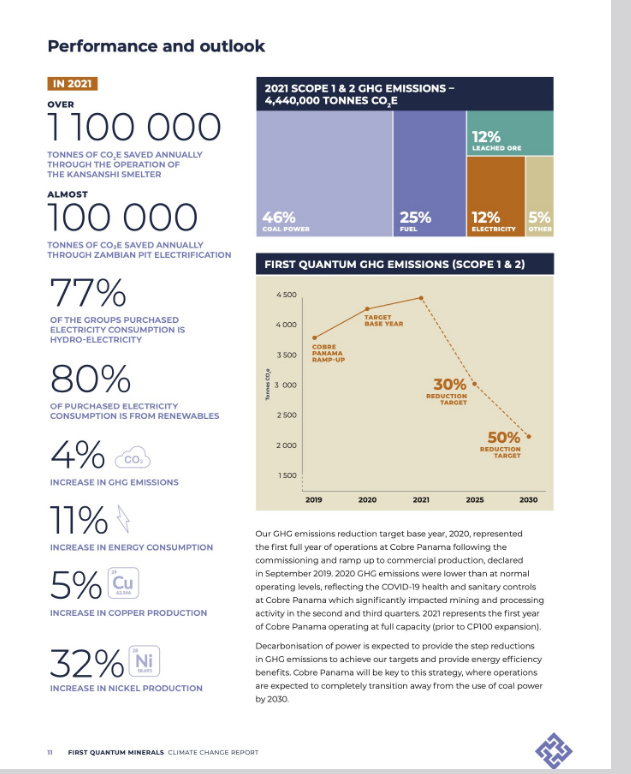

--- OCR Result 3 ---
# **Performance and outlook**

![img-0.jpeg](img-0.jpeg)

![img-1.jpeg](img-1.jpeg)

![img-2.jpeg](img-2.jpeg)

![img-3.jpeg](img-3.jpeg)

![img-4.jpeg](img-4.jpeg)

![img-5.jpeg](img-5.jpeg)

Our GHG emissions reduction target base year, 2020, represented the first full year of operations at Cobre Panama following the commissioning and ramp up to commercial production, declared in September 2019. 2020 GHG emissions were lower than at normal operating levels, reflecting the COVID-19 health and sanitary controls at Cobre Panama which significantly impacted mining and processing activity in the second and third quarters. 2021 represents the first year of Cobre Panama operating at full capacity (prior to CP100 expansion).

Decarbonisation of power is expected to provide the step reductions in GHG emissions to achieve our targets and provide energy efficiency benefits. Cobre Panama will be key to this strategy, where operations are expected to completely transition awa

In [7]:
from mistralai import Mistral
from PIL import Image
from google.colab import files
import base64
import io
import IPython.display as display

# Upload multiple handwritten images
def upload_handwritten_images():
    print("Please upload one or more handwritten images to process with Mistral OCR:")
    uploaded = files.upload()

    image_paths = []
    image_objects = []

    for filename in uploaded.keys():
        image = Image.open(io.BytesIO(uploaded[filename]))
        path = f"/content/{filename}"
        image.save(path)
        image_paths.append(path)
        image_objects.append(image)

    return image_objects, image_paths

# Encode image to base64
def encode_image(image_path):
    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")
    except Exception as e:
        print(f"Error encoding image: {e}")
        return None

# Extract text using Mistral OCR
def get_mistral_ocr_text(api_key, image_path):
    base64_image = encode_image(image_path)
    if base64_image is None:
        return None

    try:
        client = Mistral(api_key=api_key)
        response = client.ocr.process(
            model="mistral-ocr-latest",
            include_image_base64=True,
            document={
                "type": "image_url",
                "image_url": f"data:image/png;base64,{base64_image}"
            }
        )
        return "\n".join(page.markdown for page in response.pages)
    except Exception as e:
        print(f"Error in Mistral OCR: {e}")
        return None

# Main execution
def main():
    API_KEY = "WTRLJObkMjgcbXQYKzznKdYYjhQb3mGd"
    print("Starting Mistral OCR for Multiple Images")
    print("-" * 60)

    images, image_paths = upload_handwritten_images()
    if not image_paths:
        return

    for i, (img, path) in enumerate(zip(images, image_paths), 1):
        print(f"\n--- Image {i} ---")
        display.display(img)

        mistral_text = get_mistral_ocr_text(API_KEY, path)
        print(f"--- OCR Result {i} ---")
        if mistral_text:
            print(mistral_text)
        else:
            print("Failed to extract text with Mistral.")

if __name__ == "__main__":
    main()


In [ ]:
from mistralai import Mistral
from google.colab import files
from PIL import Image
import os

# Step 1: Upload file using Colab UI
uploaded = files.upload()

# Step 2: Get uploaded file path
uploaded_file_path = list(uploaded.keys())[0]

# Step 3: Check file type
file_extension = os.path.splitext(uploaded_file_path)[1].lower()
is_image = file_extension in [".jpg", ".jpeg", ".png"]
is_pdf = file_extension == ".pdf"

if not (is_image or is_pdf):
    raise ValueError("Unsupported file format. Please upload a PDF or image file.")

# Step 4: Convert image to PDF if needed
if is_image:
    image = Image.open(uploaded_file_path).convert("RGB")
    converted_pdf_path = uploaded_file_path.rsplit(".", 1)[0] + "_converted.pdf"
    image.save(converted_pdf_path, "PDF", resolution=100.0)
    uploaded_file_path = converted_pdf_path

# Step 5: Initialize Mistral client
api_key = "jXGjhaqmSonq4hSK3f6KkqFLopGH8b8d"  # Replace with your actual API key
client = Mistral(api_key=api_key)

# Step 6: Upload file to Mistral
with open(uploaded_file_path, "rb") as f:
    uploaded_file = client.files.upload(
        file={
            "file_name": os.path.basename(uploaded_file_path),
            "content": f,
        },
        purpose="ocr"
    )

# Step 7: Get signed URL
retrieved_file = client.files.retrieve(file_id=uploaded_file.id)
signed_url = client.files.get_signed_url(file_id=uploaded_file.id)

# Step 8: Perform OCR
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=False
)

# Step 9: Extract markdown and save to file
output_md = ""
for page in ocr_response.pages:
    output_md += page.markdown + "\n\n"

output_filename = os.path.splitext(uploaded_file_path)[0] + "_ocr_output.md"
with open(output_filename, "w") as f:
    f.write(output_md)

# Step 10: Download the markdown file
files.download(output_filename)